In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

In [2]:
df=pd.read_csv("/home/dev/Downloads/Dataset/sample0.csv")
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.147,16556,192.168.100.3,80,17,188.0,84,3,0,0,...,0,0,0,0,0,0,0.0,1,DDoS,NF-BoT-IoT-v2
1,192.168.100.148,41402,192.168.100.3,80,6,7.0,140,1,0,0,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.32,64169,192.168.35.84,443,6,91.0,44,1,0,0,...,0,0,0,0,0,0,0.0,1,scanning,NF-ToN-IoT-v2
3,172.31.69.17,54746,204.2.197.201,443,6,0.0,767,10,7258,12,...,29200,0,0,0,0,0,0.0,0,Benign,NF-CSE-CIC-IDS2018-v2
4,192.168.1.35,50806,192.168.1.195,80,6,7.0,686,6,1494,5,...,65535,0,0,0,0,0,0.0,1,xss,NF-ToN-IoT-v2


In [3]:
df.isna().sum()

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_THROUGHPUT      0
NUM_PKTS_U

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IPV4_SRC_ADDR                1000000 non-null  object 
 1   L4_SRC_PORT                  1000000 non-null  int64  
 2   IPV4_DST_ADDR                1000000 non-null  object 
 3   L4_DST_PORT                  1000000 non-null  int64  
 4   PROTOCOL                     1000000 non-null  int64  
 5   L7_PROTO                     1000000 non-null  float64
 6   IN_BYTES                     1000000 non-null  int64  
 7   IN_PKTS                      1000000 non-null  int64  
 8   OUT_BYTES                    1000000 non-null  int64  
 9   OUT_PKTS                     1000000 non-null  int64  
 10  TCP_FLAGS                    1000000 non-null  int64  
 11  CLIENT_TCP_FLAGS             1000000 non-null  int64  
 12  SERVER_TCP_FLAGS             1000000 non-nu

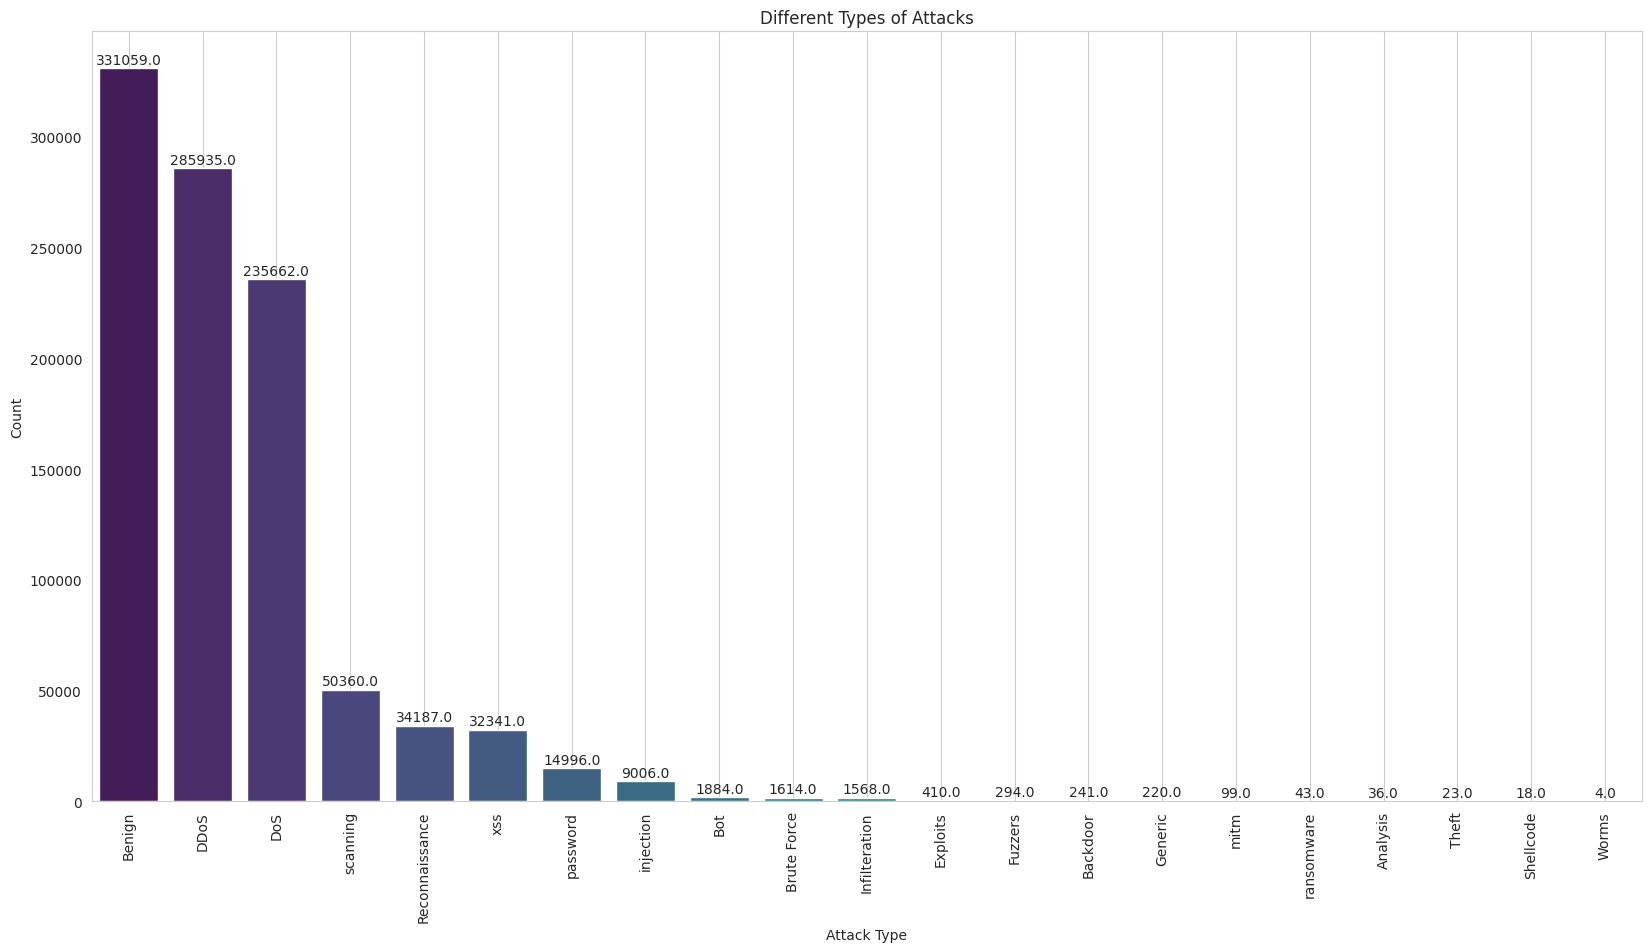

In [5]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Attack', data=df, order=df['Attack'].value_counts().index, palette='viridis')
plt.title('Different Types of Attacks')
plt.xlabel('Attack Type')
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 2000), ha='center', va='baseline')

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/home/dev/Downloads/9810e03bba4983da_MOHANAD_A4706/data/NF-UQ-NIDS-v2.csv'

# Use Pandas to read the CSV file in chunks
chunk_size = 10000  # Adjust the chunk size as needed
chunks = pd.read_csv(file_path, chunksize=chunk_size)

# Specify the directory where you want to save the chunked CSV files
output_directory = 'path/to/output/directory/'

# Process the data in chunks and save each chunk to a separate CSV file
for i, chunk in enumerate(chunks):
    # Create a unique filename for each chunk (e.g., chunk_0.csv, chunk_1.csv, etc.)
    output_file = f'{output_directory}chunk_{i}.csv'
    
    # Save the chunk to the specified output file
    chunk.to_csv(output_file, index=False)
    print(f'Saved chunk {i} to {output_file}')


In [1]:
import tensorflow as tf

# Define the column names and their corresponding types
column_names = [
    'IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL',
    'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS',
    'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
    'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
    'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
    'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
    'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
    'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
    'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
    'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
    'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
    'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
    'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'
]

# Define the types for each column
column_types = [
    tf.string, tf.float32, tf.string, tf.float32, tf.float32,
    tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32,
    tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32,
    tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32,
    tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32,
    tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32,
    tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32,
    tf.string, tf.string, tf.string
]

# File path to your CSV file
file_path = '/home/dev/Downloads/9810e03bba4983da_MOHANAD_A4706/data/NF-UQ-NIDS-v2.csv'

# Buffer size and batch size for efficient loading
buffer_size = 8 * 1024 * 1024  # 8 MB
batch_size = 32  # You can adjust the batch size according to your needs

# Initialize the CsvDataset
csv_dataset = tf.data.experimental.CsvDataset(
    file_path,
    column_types,
    header=True,
    field_delim=',',
    buffer_size=buffer_size
)

# Batch the dataset
csv_dataset = csv_dataset.batch(batch_size)

# Example: Take a look at one batch of data to see if it loaded correctly
for batch in csv_dataset.take(1):
    print([col.shape for col in batch])  # Print shapes of each column in the batch


2023-09-19 18:45:02.721670: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-19 18:45:02.753192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 18:45:02.979281: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 18:45:02.980741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 18:45:03.826526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_44_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expect 44 fields but have more in record [Op:IteratorGetNext] name: 